# Daily Closing Price Change (movement)

We will compute the price change of daily Stock dataset using Python. The method used will be the diff() method and this will essentially tell us the daily price movement. Furthermore, we will compute the description statisitics of the price change to get insight into the market hisory.

What is Central Tendency?

Measures of central tendency are summary statistics that represent the center point or typical value of a dataset. Examples of these measures include the mean, median, and mode. These statistics indicate where most values in a distribution fall and are also referred to as the central location of a distribution. You can think of central tendency as the propensity for data points to cluster around a middle value.

Whether you’re using the mean, median, or mode, the central tendency is only one characteristic of a distribution. Another aspect is the variability around that central value. WVariability describes how far away the data points tend to fall from the center. 

The mean doesn’t always locate the center of the data accurately. 

Mean, Median, and Mode: Measures of Central Tendency




In [1]:
import numpy # numerical python for heavy numeric computations
import pandas as pd # analytical library

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 
from sklearn.model_selection import train_test_split

In statistics, the mean, median, and mode are the three most common measures of central tendency. Each one calculates the central point using a different method. Choosing the best measure of central tendency depends on the type of data you have. In this post, I explore the mean, median, and mode as measures of central tendency, show you how to calculate them, and how to determine which one is best for your data.

The mean doesn’t always locate the center of the data accurately. In a symmetric distribution, the mean locates the center accurately.

However, in a skewed distribution, the mean can miss the mark. This problem occurs because outliers have a substantial impact on the mean as a measure of central tendency. Extreme values in an extended tail pull the mean away from the center. As the distribution becomes more skewed, the mean is drawn further away from the center. Consequently, it’s best to use the mean as a measure of the central tendency when you have a symmetric distribution.

In [2]:
# Create Dataframe from excel file & parse dates
data = pd.read_csv('AA.csv', parse_dates = True)

# create copy of orginal dataframe
saved_df = data.copy(deep = True)

# FEATURE ENGINEERING
data['close-change'] = data['Close'].diff() # difference between the values in current row and previous row

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,close-change
0,1962-01-02,6.532155,6.556185,6.532155,6.532155,1.536658,55900,NaN
1,1962-01-03,6.532155,6.632280,6.524145,6.632280,1.560212,74500,0.100125
2,1962-01-04,6.632280,6.664320,6.632280,6.632280,1.560212,80500,0.000000
3,1962-01-05,6.632280,6.656310,6.616260,6.624270,1.558326,70500,-0.008010
4,1962-01-08,6.608250,6.608250,6.339915,6.408000,1.507450,93800,-0.216270


# Analysis

DATAFRAME - SAMPLE POPULATION ANALYSIS

In [4]:
df = data[['Date','Open','Close','close-change']]
df = df.iloc[14600:14662]
df

,Date,Open,Close,close-change
14600,2020-01-02,21.860001,21.420000,-0.090000
14601,2020-01-03,21.170000,21.500000,0.080000
14602,2020-01-06,21.340000,21.000000,-0.500000
14603,2020-01-07,21.059999,21.320000,0.320000
14604,2020-01-08,21.299999,20.459999,-0.860001
...,...,...,...,...
14657,2020-03-25,7.930000,7.090000,-0.180000
14658,2020-03-26,7.270000,6.840000,-0.250000
14659,2020-03-27,6.510000,6.550000,-0.290000
14660,2020-03-30,6.550000,6.070000,-0.480000


### Descriptional Statisics

In [5]:
print(df['close-change'].describe()) # -->> descriptional statistics 

count    62.000000
mean     -0.247581
std       0.681853
min      -2.400000
25%      -0.592500
50%      -0.185000
75%       0.105000
max       1.600000
Name: close-change, dtype: float64


Values derived here are not absolute values. To review we are analysing daily closing price changes in this stock and the summary statistics here take into consideration the direction of the price movement between one value and another. Simply, the (-) indicates the price has dercreased (trending downwards) in contrast to absoulte values (+) indicating the price has increased bewteen the previous and current day.

THOUGHT

- If we are interested in trend direction then we keep these metrics (absolute & opposite) values
- If we are not interested in trend direction but the absolute value we need to change all values to absolute values.

We want to build a model based on this historical dataset to find the best range a value may fall within to make an informed decision on the next price movent.


### Data Visualization
We will use a line plot to visualize the closing price trend across the timeframe. We can see how volatile the trend is over the timeframe.

NOTE

We have no re-indexed our dataframe to use the Date column accross the x-axis. 

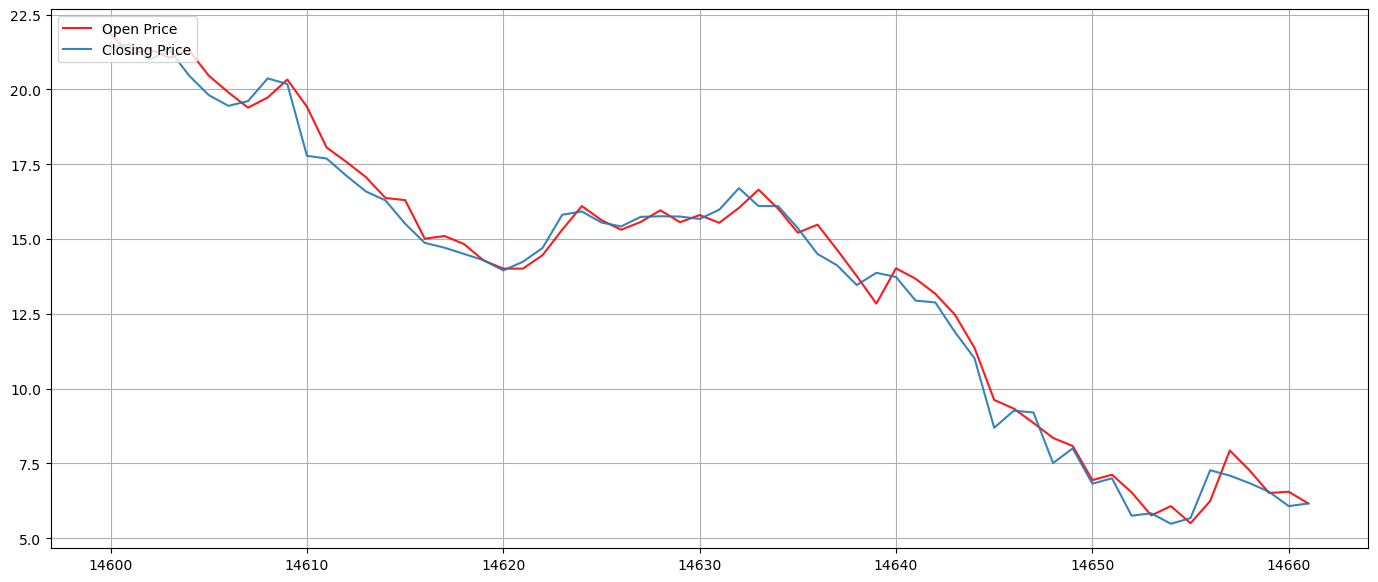

In [6]:
plt.figure(figsize=[17,7])
plt.grid(True)
plt.plot(df['Open'],label='Open Price',color='r',alpha=0.9)
plt.plot(df['Close'],label='Closing Price',alpha=0.9)
plt.legend(loc=2)

The below histogram is a visual representation of the distribution of quantitative data -->> daily closing price change. We can see a large quantity of this data falls within a certain range distributed around the mean value. The task here is to find specifically what that range is for the purpose of making informed decisions for future trades.

If we convert these price movements to absolute values this will show a skewed distribution.

QUESTION 

Are we interested in the direction of the price movement or the isolated absolute price movement value ?

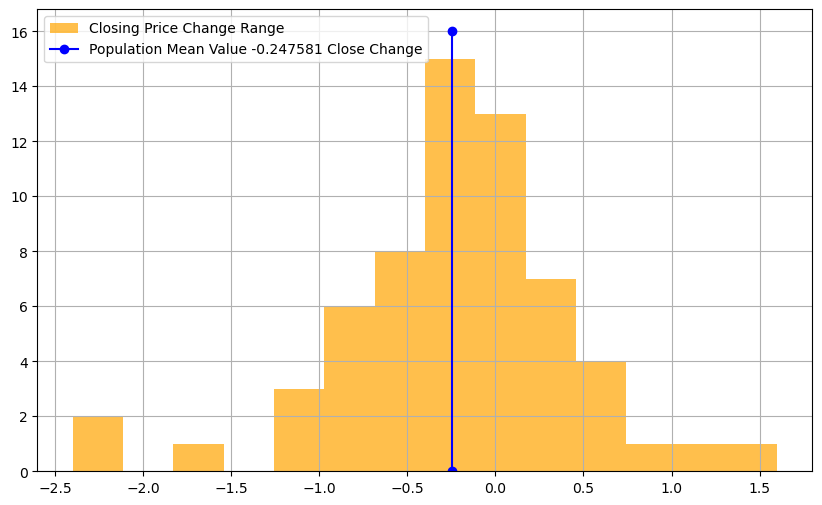

In [8]:
# data points which will sit along the x axis 
x1, y1 = [-0.247581,-0.247581], [16,0] 

plt.figure(figsize=[10,6])
plt.grid(True)
plt.hist(df['close-change'], bins=14, label='Closing Price Change Range',color='orange',alpha=0.7)
plt.plot(x1, y1,label='Population Mean Value -0.247581 Close Change', marker = 'o', color='blue')
plt.legend(loc=2)

The below scatterplot gives a good indication of when we seen highest to lowest volatility in the daily closing price movements over this timeframe. This is a very interesting plot.

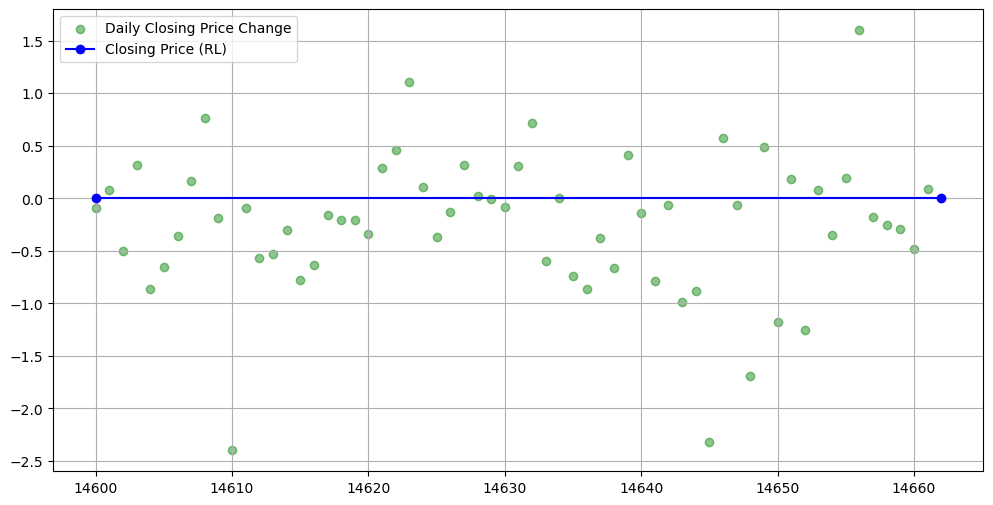

In [9]:
# data points which will sit along the x axis 
x1, y1 = [14600,14662], [0,0] 

plt.figure(figsize=[12,6])
plt.grid(True)
plt.scatter(df.index,df['close-change'],label='Daily Closing Price Change',color='green',alpha=0.45)
plt.plot(x1, y1,label='Closing Price (RL)', marker = 'o',color='b')
plt.legend(loc=2)

# MODELING
Build a simple function that will test the values fall within specific range. Ideally, from the descriptive statistics derived from above we want to make an informed decision on a future closing price.

The function/model will test what percentage we would have been correct.

We will simply use .loc to split the dataset for testing rather than using sklearn library - traing test split. The reason for this is we want to keep the order of our observations(rows).

In [10]:
def test(dataset,greater,less):    
    """dataset = dataframe to input into our model"""
    """greater = the value we want to compare a value from and be greater than"""
    """less = the value we want to compare a value to and be less than"""
    global vals # -->> declare variable globally (callable outside function scope)
    vals = [] # empty list
    for value in dataset['close-change']:
        if (value >= greater) and (value <= less):
            vals.append(1)
        else:
            vals.append(0)
            
    # create new df
    global test # -->> global keyword - decalre globally
    test = dataset[['Close','close-change']]
    test['threshold'] = vals
    print(test)
    
    # = visualy analyse countplot
    sns.countplot(test, x="threshold")
    
    # result output
    counts = test['threshold'].value_counts()
    percs = test['threshold'].value_counts(normalize=True).round(2)
    print(counts)
    print(percs)
 

SAMPLE POPULATION TESTING

We will use a sample population to test price movements against descriptive statistics dervied from the N population.

We will use the Standard Deviation value to test the range. Remember the std tells us on avergae how far values fall from the mean value.

In [11]:
test_1 = data[['Date','Open','Close','close-change']]
test_1 = data.iloc[1000:1500]
test_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,close-change
1000,1965-12-21,7.056810,7.25706,7.056810,7.257060,1.845547,133800,0.216270
1001,1965-12-22,7.257060,7.40925,7.241040,7.341165,1.866938,200300,0.084105
1002,1965-12-23,7.349175,7.40925,7.349175,7.365195,1.873048,93800,0.024030
1003,1965-12-27,7.409250,7.45731,7.409250,7.409250,1.884250,105800,0.044055
1004,1965-12-28,7.409250,7.44930,7.357185,7.441290,1.892399,103800,0.032040


In [12]:
print(data[['Close','close-change']].describe())

              Close  close-change
count  14663.000000  14662.000000
mean      26.969156     -0.000019
std       24.938202      0.858606
min        3.652560     -8.939156
25%        7.677585     -0.168209
50%       19.272060      0.000000
75%       36.932055      0.168213
max      113.782051      8.122139


C:\Users\dwatters\AppData\Local\Temp\ipykernel_7420\2883673270.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['threshold'] = vals


         Close  close-change  threshold
1000  7.257060      0.216270          1
1001  7.341165      0.084105          1
1002  7.365195      0.024030          1
1003  7.409250      0.044055          1
1004  7.441290      0.032040          1
...        ...           ...        ...
1495  7.649550     -0.084105          0
1496  7.609500     -0.040050          0
1497  7.549425     -0.060075          0
1498  7.525395     -0.024030          0
1499  7.541415      0.016020          1

[500 rows x 3 columns]
1    275
0    225
Name: threshold, dtype: int64
1    0.55
0    0.45
Name: threshold, dtype: float64


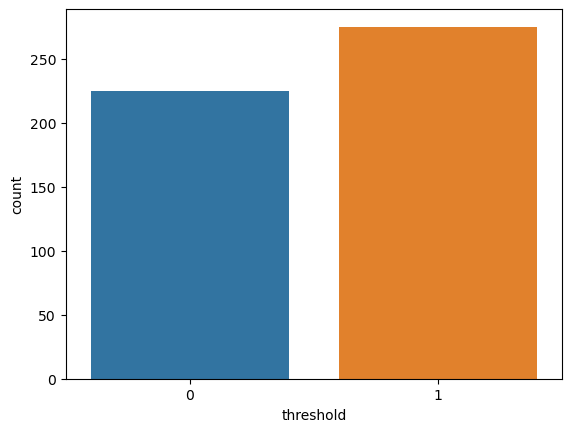

In [13]:
test(test_1,-0.000019,0.858606)

# Evaluation

The above model is more so to showcase how something like this can be put together.

If we used the mean and stadard deviation of the N population (whole dataset) as a range values (price movements of the next observation) would fall within we would have been orrect 55% of the time based on this sample population (N-1) test.

Further research & testing is required to find what is the best fitted range to test in this model. The challenge is how do we come to that finding and will be the task.

In the real world usecase if we were opening a trade the range we have used based on pre-historic data would be a well informed decision for opening the trade.

For ex. observation (row) 1003 the Closing Price was 7.409250 on this date 1965-12-27. Our model above tested if we opened a trade that the next price movement would fall between this range (-0.000019 --> 0.858606) we would have been correct observation (row) 1004 | 1965-12-28 | Closing Price = 7.441290.

Remember based on this sample population (N-1) analysis we would have been correct 55% of the time. This is valuable information.
